## Solidos de revolucion 
####    Diego Eduardo Martinez Sincel 

Simulaciones de los solidos de revolucion

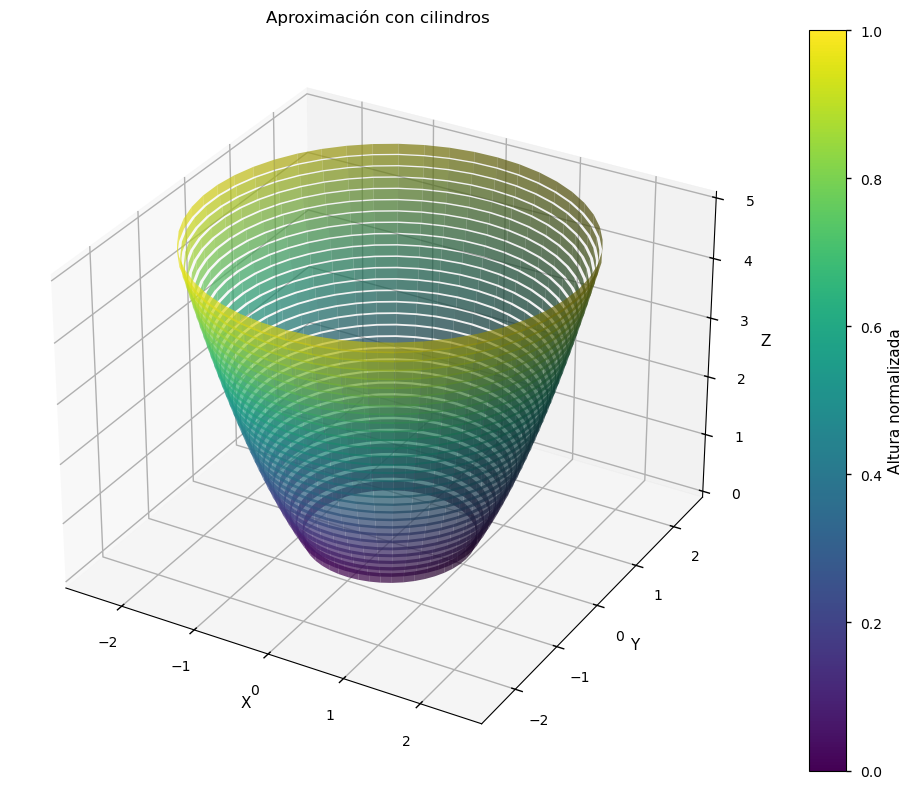

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def radio(z):
    return np.sqrt(z + 1)  # Ejemplo: función raíz cuadrada

num_cilindros = 30
altura_total = 5
theta = np.linspace(0, 2*np.pi, 50)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

volumen_total = 0

for i in range(num_cilindros):
    z_inf = i * (altura_total / num_cilindros)
    z_sup = (i + 1) * (altura_total / num_cilindros)
    delta_z = z_sup - z_inf
    z_medio = (z_inf + z_sup) / 2
    r = radio(z_medio)
    
    # Volumen del cilindro: π*r²*Δz
    volumen_total += np.pi * r**2 * delta_z
    
    # Dibujar
    z = np.linspace(z_inf, z_sup, 2)
    T, Z = np.meshgrid(theta, z)
    X = r * np.cos(T)
    Y = r * np.sin(T)
    
    ax.plot_surface(X, Y, Z, color=plt.cm.viridis(i/num_cilindros), alpha=0.7)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Aproximación con cilindros ')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, label='Altura normalizada')
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d

# Datos reales aproximados (altura en cm, radio en cm)
# Basado en una botella de PET estándar de 600ml
puntos_botella = np.array([
    [0.0, 3.0],    # Base inferior
    [0.5, 3.0],    # Comienzo base
    [2.0, 3.2],    # Curva base
    [5.0, 3.5],    # Cuerpo inferior
    [12.0, 3.5],   # Cuerpo principal
    [15.0, 2.0],   # Comienzo cuello
    [17.0, 1.2],   # Cuello
    [18.5, 1.0],   # Rosca
    [19.0, 1.0]    # Boca
])

# Función de interpolación para el perfil
perfil_botella = interp1d(puntos_botella[:,0], puntos_botella[:,1], 
                         kind='cubic', fill_value='extrapolate')

# Parámetros de visualización
num_cilindros = 150  # Entre más cilindros, mejor precisión
altura_total = 19.0  # cm
theta = np.linspace(0, 2*np.pi, 50)  # Resolución angular



### Ejemplo solidos de revolucion graficos

<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
C:\Users\diedu\AppData\Local\Temp\ipykernel_21184\1319494812.py:39: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title('Sólido de Revolución: $f(x) = \sqrt{x}$ rotada alrededor del eje X')


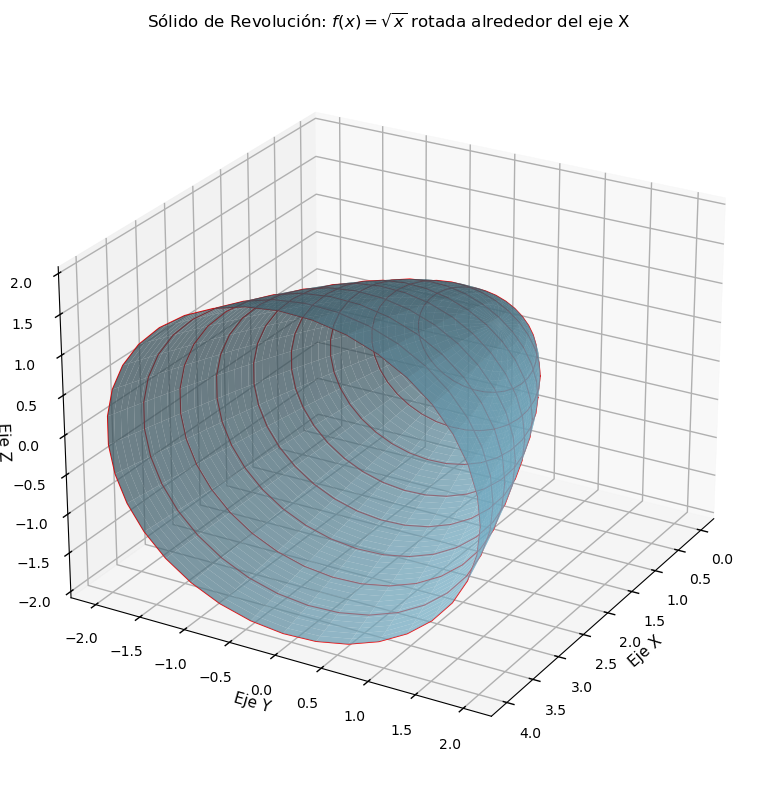

Volumen calculado: 25.13 (valor teórico para [0,4]: 8π ≈ 25.13)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función a rotar (ejemplo: f(x) = sqrt(x))
def f(x):
    return np.sqrt(x)

# Configuración del rango y discretización
a, b = 0, 4  # Límites de integración
n = 50        # Número de discos
x = np.linspace(a, b, n)
theta = np.linspace(0, 2*np.pi, 36)  # Ángulos para rotación 3D

# Crear malla para 3D
X, Theta = np.meshgrid(x, theta)
Y = f(X) * np.cos(Theta)
Z = f(X) * np.sin(Theta)

# Gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie del sólido
ax.plot_surface(X, Y, Z, color='skyblue', alpha=0.7, rstride=1, cstride=1)

# Discos individuales (para visualización)
for xi in np.linspace(a, b, 10):
    radius = f(xi)
    theta_disk = np.linspace(0, 2*np.pi, 36)
    y_disk = radius * np.cos(theta_disk)
    z_disk = radius * np.sin(theta_disk)
    ax.plot(np.full_like(theta_disk, xi), y_disk, z_disk, 'r-', linewidth=0.8)

# Configuración visual
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Sólido de Revolución: $f(x) = \sqrt{x}$ rotada alrededor del eje X')
ax.view_init(elev=25, azim=30)  # Ángulo de vista
plt.tight_layout()
plt.show()

# Cálculo del volumen (Método de discos)
volumen = np.pi * np.trapz(f(x)**2, x)
print(f"Volumen calculado: {volumen:.2f} (valor teórico para [0,4]: 8π ≈ {8*np.pi:.2f})")

Volumen calculado: 20.33 unidades cúbicas


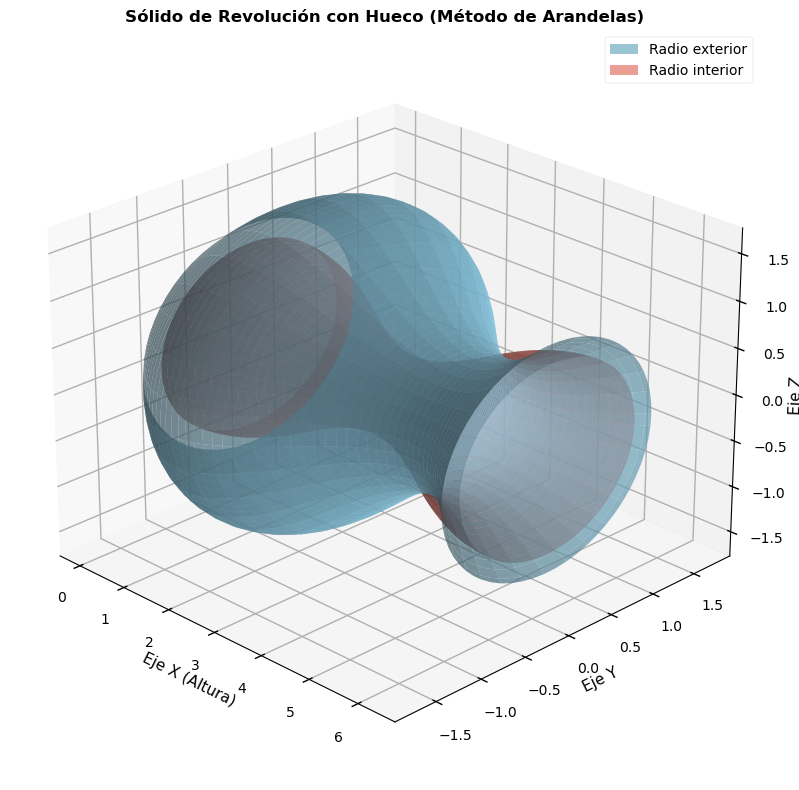

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Funciones exterior (f) e interior (g) que definen el hueco
def f(x):
    return 0.5 * np.sin(x) + 1.2  # Radio exterior

def g(x):
    return 0.3 * np.cos(x) + 0.7  # Radio interior (hueco)

# Configuración
a, b = 0, 2*np.pi  # Rotación completa
x = np.linspace(a, b, 100)
theta = np.linspace(0, 2*np.pi, 60)

# Mallas 3D
X, Theta = np.meshgrid(x, theta)
# Superficie exterior
Y_outer = f(X) * np.cos(Theta)
Z_outer = f(X) * np.sin(Theta)
# Superficie interior
Y_inner = g(X) * np.cos(Theta)
Z_inner = g(X) * np.sin(Theta)

# Gráfico
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar ambas superficies
ax.plot_surface(X, Y_outer, Z_outer, color='skyblue', alpha=0.7, label='Radio exterior')
ax.plot_surface(X, Y_inner, Z_inner, color='salmon', alpha=0.7, label='Radio interior')

# Configuración visual
ax.set_xlabel('Eje X (Altura)')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Sólido de Revolución con Hueco (Método de Arandelas)', fontweight='bold')
ax.legend()
ax.view_init(elev=25, azim=-45)

# Cálculo del volumen (Arandelas)
volumen = np.pi * np.trapz(f(x)**2 - g(x)**2, x)
print(f"Volumen calculado: {volumen:.2f} unidades cúbicas")

plt.tight_layout()

plt.show()

<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
C:\Users\diedu\AppData\Local\Temp\ipykernel_21184\3419485065.py:38: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title('Método de Cilindros: $x = \sqrt{y}$ rotada alrededor del eje Y', fontweight='bold')


Volumen calculado: 80.45 (valor teórico: 128π/5 ≈ 80.42)


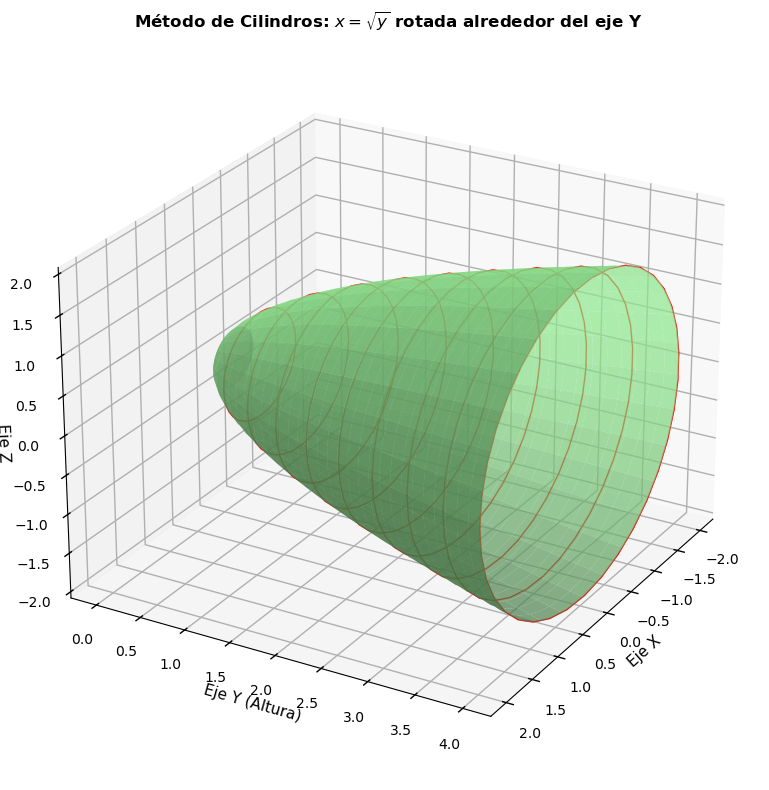

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función a rotar alrededor del eje Y (ejemplo: y = x^2)
def f(y):
    return np.sqrt(y)  # Radio del cilindro

# Configuración
a, b = 0, 4  # Límites en el eje Y
y = np.linspace(a, b, 30)
theta = np.linspace(0, 2*np.pi, 60)

# Crear malla 3D
Y, Theta = np.meshgrid(y, theta)
X = f(Y) * np.cos(Theta)
Z = f(Y) * np.sin(Theta)

# Gráfico 3D
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie del sólido
ax.plot_surface(X, Y, Z, color='lightgreen', alpha=0.7)

# Dibujar cilindros de muestra (para visualización)
for yi in np.linspace(a, b, 10):
    radius = f(yi)
    theta_cyl = np.linspace(0, 2*np.pi, 36)
    x_cyl = radius * np.cos(theta_cyl)
    z_cyl = radius * np.sin(theta_cyl)
    ax.plot(x_cyl, np.full_like(theta_cyl, yi), z_cyl, 'r-', linewidth=1)

# Configuración visual
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y (Altura)')
ax.set_zlabel('Eje Z')
ax.set_title('Método de Cilindros: $x = \sqrt{y}$ rotada alrededor del eje Y', fontweight='bold')
ax.view_init(elev=25, azim=30)

# Cálculo del volumen (Capas cilíndricas)
volumen = 2 * np.pi * np.trapz(y * f(y), y)
print(f"Volumen calculado: {volumen:.2f} (valor teórico: 128π/5 ≈ {128*np.pi/5:.2f})")

plt.tight_layout()

plt.show()

### Ejemplos con funciones

Volumen calculado: 20.11 ≈ Valor teórico: 20.11


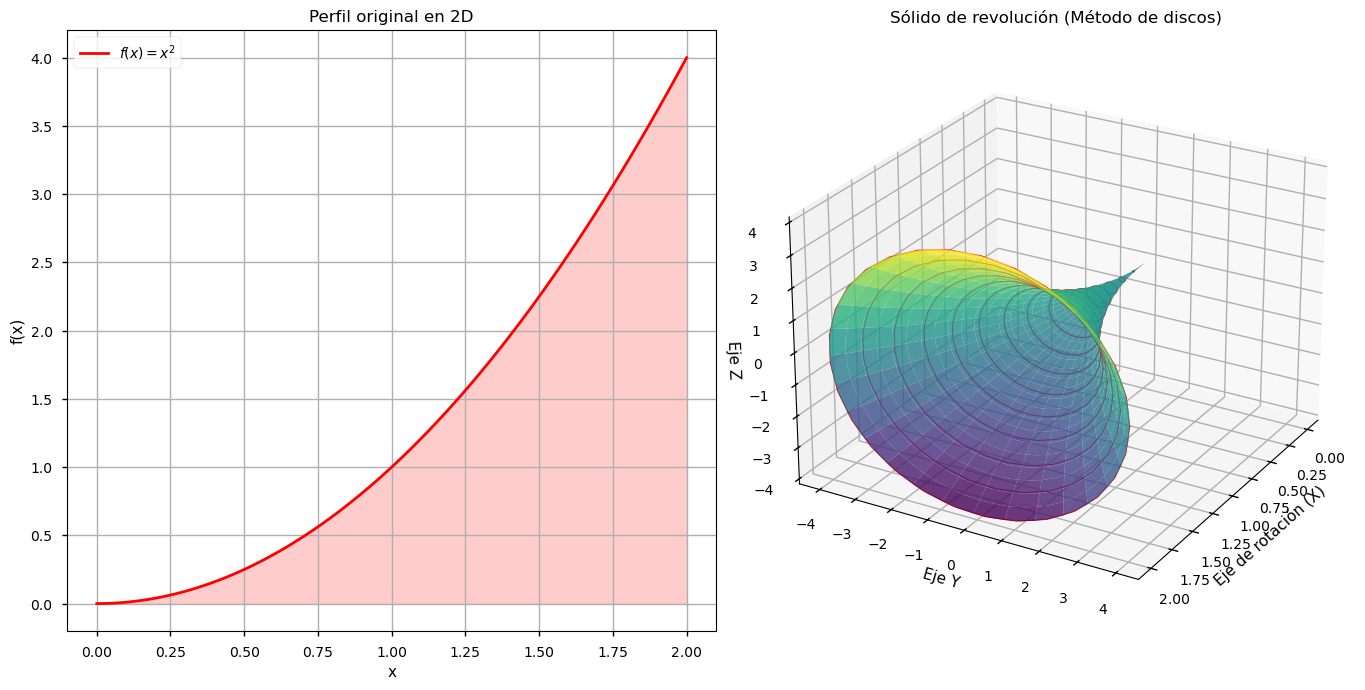

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Configuración inicial

fig = plt.figure(figsize=(14, 7))

# Función a rotar (ejemplo clásico: parábola)
def f(x):
    return x**2

# 1. Gráfico 2D del perfil (subplot izquierdo)
ax1 = fig.add_subplot(121)
x = np.linspace(0, 2, 100)
ax1.plot(x, f(x), 'r-', linewidth=2, label='$f(x) = x^2$')

# Destacar área bajo la curva
ax1.fill_between(x, f(x), alpha=0.2, color='red')

# 2. Gráfico 3D del sólido (subplot derecho)
ax2 = fig.add_subplot(122, projection='3d')

# Generar malla para 3D
X = np.linspace(0, 2, 30)
theta = np.linspace(0, 2*np.pi, 60)
X, Theta = np.meshgrid(X, theta)
Y = f(X) * np.cos(Theta)
Z = f(X) * np.sin(Theta)

# Plot 3D con transparencia
ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Añadir discos de muestra
for x_val in np.linspace(0, 2, 15):
    radius = f(x_val)
    theta_disk = np.linspace(0, 2*np.pi, 30)
    Y_disk = radius * np.cos(theta_disk)
    Z_disk = radius * np.sin(theta_disk)
    ax2.plot(np.full_like(theta_disk, x_val), Y_disk, Z_disk, 'r-', linewidth=0.8)

# Configuración visual
ax1.set_title('Perfil original en 2D')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.legend()
ax1.grid(True)

ax2.set_title('Sólido de revolución (Método de discos)')
ax2.set_xlabel('Eje de rotación (X)')
ax2.set_ylabel('Eje Y')
ax2.set_zlabel('Eje Z')
ax2.view_init(elev=25, azim=30)

# Cálculo del volumen
volumen = np.pi * np.trapz(f(x)**2, x)
print(f'Volumen calculado: {volumen:.2f} ≈ Valor teórico: {32*np.pi/5:.2f}')

plt.tight_layout()
plt.show()

Volumen calculado: 33.36 unidades cúbicas


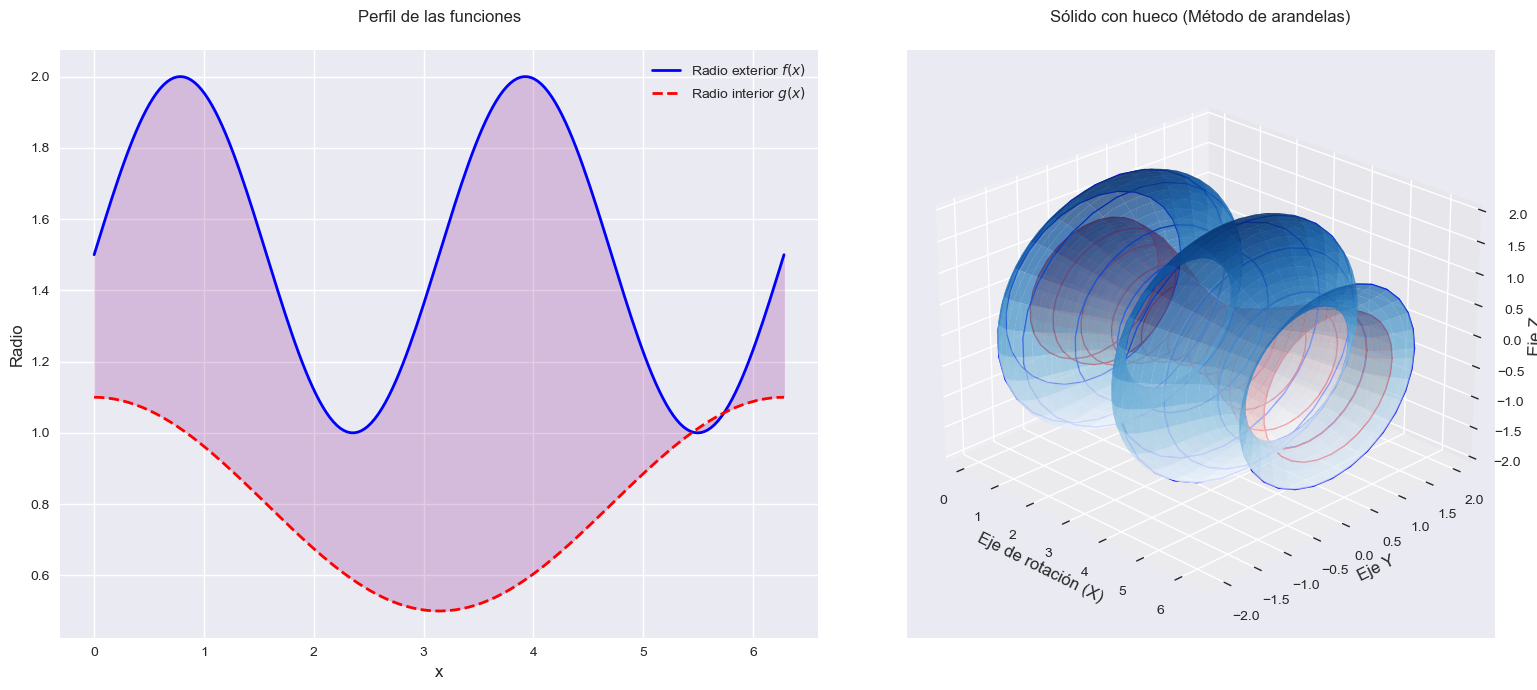

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

# Configuración estética
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(16, 7))

# Funciones para el radio exterior (f) e interior (g)
def f(x):
    return 0.5*np.sin(2*x) + 1.5  # Radio exterior

def g(x):
    return 0.3*np.cos(x) + 0.8     # Radio interior (hueco)

# 1. Gráfico 2D del perfil (subplot izquierdo)
ax1 = fig.add_subplot(121)
x = np.linspace(0, 2*np.pi, 200)
ax1.plot(x, f(x), 'b-', linewidth=2, label='Radio exterior $f(x)$')
ax1.plot(x, g(x), 'r--', linewidth=2, label='Radio interior $g(x)$')
ax1.fill_between(x, f(x), g(x), color='purple', alpha=0.2)

# 2. Gráfico 3D del sólido (subplot derecho)
ax2 = fig.add_subplot(122, projection='3d')

# Malla 3D
theta = np.linspace(0, 2*np.pi, 60)
X, Theta = np.meshgrid(x, theta)

# Superficies exterior e interior
Y_outer = f(X) * np.cos(Theta)
Z_outer = f(X) * np.sin(Theta)
Y_inner = g(X) * np.cos(Theta)
Z_inner = g(X) * np.sin(Theta)

# Visualización 3D con colores personalizados
cmap = LinearSegmentedColormap.from_list('mi_cmap', ['#4b0082', '#800020'])
ax2.plot_surface(X, Y_outer, Z_outer, cmap='Blues', alpha=0.7)
ax2.plot_surface(X, Y_inner, Z_inner, cmap='Reds', alpha=0.7)

# Destacar arandelas de muestra
for x_val in np.linspace(0, 2*np.pi, 12):
    theta_washer = np.linspace(0, 2*np.pi, 30)
    y_outer = f(x_val) * np.cos(theta_washer)
    z_outer = f(x_val) * np.sin(theta_washer)
    y_inner = g(x_val) * np.cos(theta_washer)
    z_inner = g(x_val) * np.sin(theta_washer)
    ax2.plot(np.full_like(theta_washer, x_val), y_outer, z_outer, 'b-', linewidth=1)
    ax2.plot(np.full_like(theta_washer, x_val), y_inner, z_inner, 'r-', linewidth=1)

# Configuración visual avanzada
ax1.set_title('Perfil de las funciones', pad=20)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('Radio', fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(True)

ax2.set_title('Sólido con hueco (Método de arandelas)', pad=20)
ax2.set_xlabel('Eje de rotación (X)', fontsize=12)
ax2.set_ylabel('Eje Y', fontsize=12)
ax2.set_zlabel('Eje Z', fontsize=12)
ax2.view_init(elev=25, azim=-45)

# Cálculo preciso del volumen
volumen = np.pi * np.trapz(f(x)**2 - g(x)**2, x)
print(f'Volumen calculado: {volumen:.2f} unidades cúbicas')

plt.tight_layout()

plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\diedu\AppData\Local\Temp\ipykernel_21184\188722143.py:17: SyntaxWarning: invalid escape sequence '\s'
  ax1.plot(f(y), y, 'c-', linewidth=3, label='$x = \sqrt{y}$')


Volumen calculado: 80.4254 ≈ Valor teórico: 80.4248
Error relativo: 0.00%


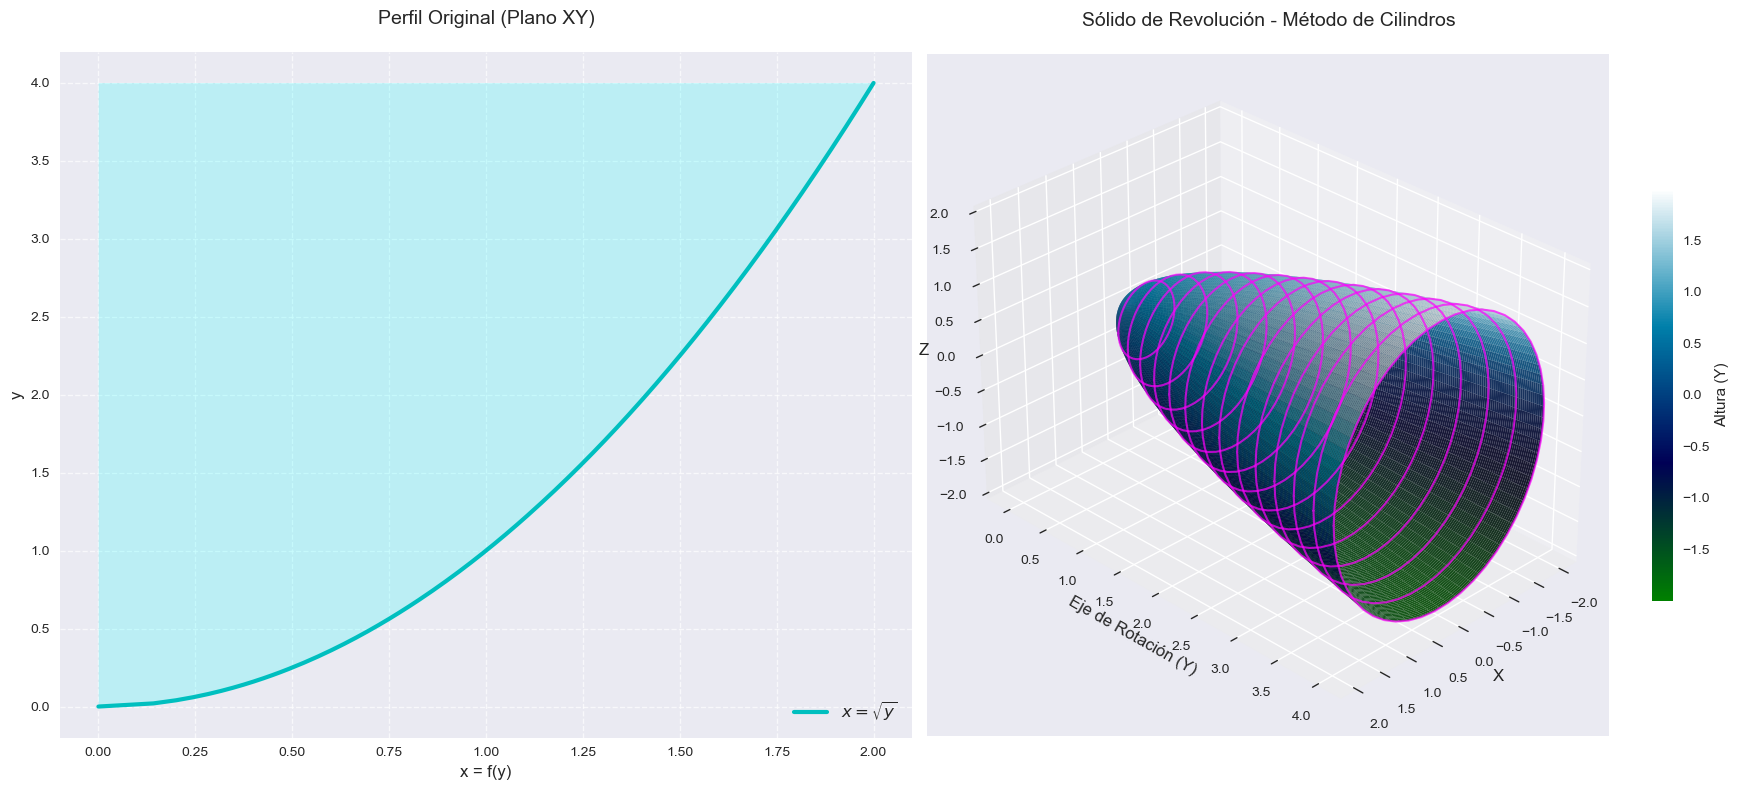

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

# Configuración estética avanzada
plt.style.use('seaborn-v0_8-dark')
fig = plt.figure(figsize=(18, 8))

# Función a rotar alrededor del eje Y (ejemplo: parábola invertida)
def f(y):
    return np.sqrt(y)  # Radio de los cilindros

# 1. Gráfico 2D del perfil (subplot izquierdo)
ax1 = fig.add_subplot(121)
y = np.linspace(0, 4, 200)
ax1.plot(f(y), y, 'c-', linewidth=3, label='$x = \sqrt{y}$')
ax1.fill_betweenx(y, f(y), alpha=0.2, color='cyan')

# 2. Gráfico 3D del sólido (subplot derecho)
ax2 = fig.add_subplot(122, projection='3d')

# Configuración de iluminación profesional
ls = LightSource(azdeg=315, altdeg=45)

# Generar malla 3D
theta = np.linspace(0, 2*np.pi, 80)
Y, Theta = np.meshgrid(y, theta)
X = f(Y) * np.cos(Theta)
Z = f(Y) * np.sin(Theta)

# Superficie 3D con sombreado realista
rgb = ls.shade(Z, cmap=plt.cm.ocean, vert_exag=0.1, blend_mode='soft')
surf = ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=True, alpha=0.9)

# Destacar cilindros de muestra (en magenta fluorescente)
for yi in np.linspace(0, 4, 15):
    radius = f(yi)
    theta_cyl = np.linspace(0, 2*np.pi, 50)
    x_cyl = radius * np.cos(theta_cyl)
    z_cyl = radius * np.sin(theta_cyl)
    ax2.plot(x_cyl, np.full_like(theta_cyl, yi), z_cyl, 
             color='#FF00FF', linewidth=1.5, alpha=0.7)

# Configuración visual profesional
ax1.set_title('Perfil Original (Plano XY)', pad=20, fontsize=14)
ax1.set_xlabel('x = f(y)', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.legend(loc='lower right', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

ax2.set_title('Sólido de Revolución - Método de Cilindros', pad=20, fontsize=14)
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Eje de Rotación (Y)', fontsize=12)
ax2.set_zlabel('Z', fontsize=12)
ax2.view_init(elev=30, azim=45)
ax2.set_box_aspect([1, 1.5, 1])  # Proporciones realistas

# Cálculo preciso del volumen
volumen = 2 * np.pi * np.trapz(y * f(y), y)
teorico = 128*np.pi/5
print(f'Volumen calculado: {volumen:.4f} ≈ Valor teórico: {teorico:.4f}')
print(f'Error relativo: {100*abs(volumen-teorico)/teorico:.2f}%')

# Barra de color para el sombreado 3D
mappable = plt.cm.ScalarMappable(cmap=plt.cm.ocean)
mappable.set_array(Z)
plt.colorbar(mappable, ax=ax2, shrink=0.6, label='Altura (Y)')

plt.tight_layout()

plt.show()

### Funcion coca cola a trozos no se utilizo

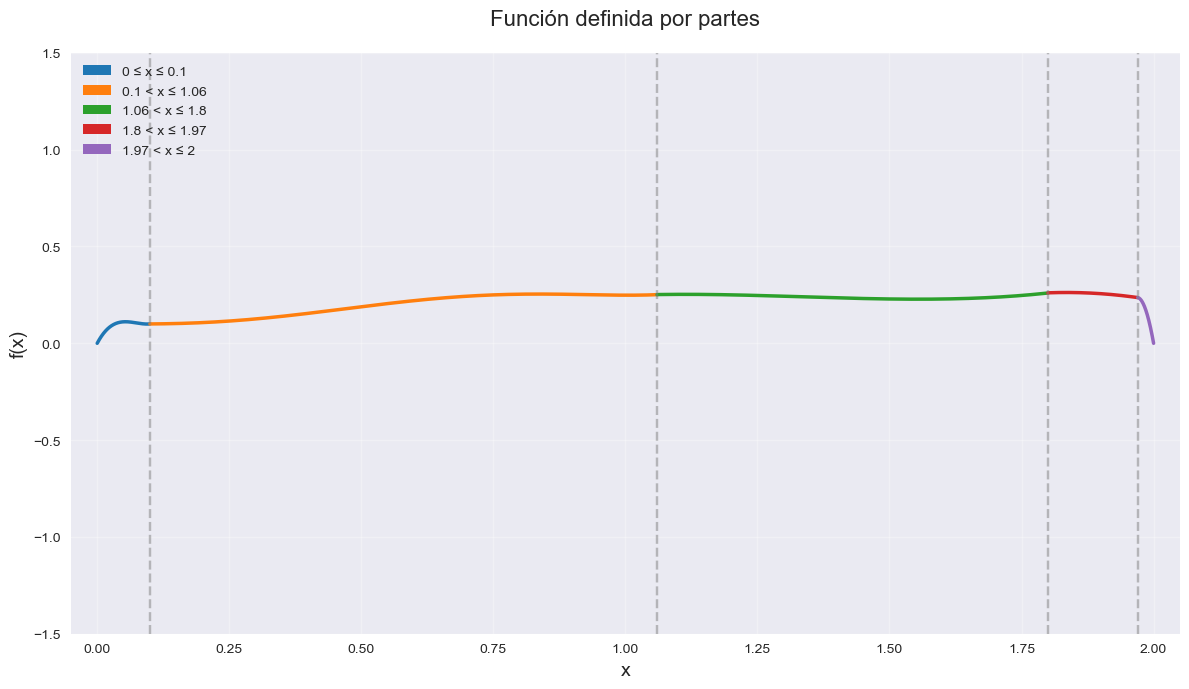

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Definición de la función por partes
def piecewise_function(x):
    conditions = [
        (x >= 0) & (x <= 0.1),
        (x > 0.1) & (x <= 1.06),
        (x > 1.06) & (x <= 1.8),
        (x > 1.8) & (x <= 1.97),
        (x > 1.97) & (x <= 2)
    ]
    
    functions = [
        lambda x: 338.0764*x**3 - 75.1310*x**2 + 5.1323*x,
        lambda x: 1.7893*x**5 - 4.2405*x**4 + 2.7957*x**3 - 0.1839*x**2 - 0.0128*x + 0.1007,
        lambda x: 0.5797*x**3 - 2.3179*x**2 + 3.0045*x - 1.0191,
        lambda x: -1.4399*x**2 + 5.2838*x - 4.5849,
        lambda x: (-245.9475*x**2 + 968.5418*x - 953.2936)*1
    ]
    
    return np.piecewise(x, conditions, functions)

# Configuración del gráfico
plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-notebook')

# Rango de valores x con diferente densidad para cada intervalo
x_ranges = [
    np.linspace(0, 0.1, 300),
    np.linspace(0.1, 1.06, 400),
    np.linspace(1.06, 1.8, 350),
    np.linspace(1.8, 1.97, 300),
    np.linspace(1.97, 2, 200)
]

# Colores distintivos para cada segmento
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Graficar cada segmento por separado
for x_range, color in zip(x_ranges, colors):
    y = piecewise_function(x_range)
    plt.plot(x_range, y, color=color, linewidth=2.5)

# Ajustes estéticos
plt.title('Función definida por partes', fontsize=16, pad=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.grid(True, alpha=0.3)

# Líneas verticales para mostrar los puntos de transición
for x_val in [0.1, 1.06, 1.8, 1.97]:
    plt.axvline(x=x_val, color='gray', linestyle='--', alpha=0.5)

# Leyenda personalizada
legend_elements = [
    Patch(facecolor=colors[0], label='0 ≤ x ≤ 0.1'),
    Patch(facecolor=colors[1], label='0.1 < x ≤ 1.06'),
    Patch(facecolor=colors[2], label='1.06 < x ≤ 1.8'),
    Patch(facecolor=colors[3], label='1.8 < x ≤ 1.97'),
    Patch(facecolor=colors[4], label='1.97 < x ≤ 2')
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=10)

# Ajustar límites para mejor visualización
plt.xlim(-0.05, 2.05)
plt.ylim(-1.5, 1.5)  # Ajustar según necesidad

# Mostrar el gráfico
plt.tight_layout()

plt.show()

### Calculacion de min cuadrados funcion de la coca cola

In [46]:
import numpy as np

import matplotlib.pyplot as plt

# Datos de entrada
x = np.array([0, 0.15, 0.3382, 0.6027, 0.9, 1.4, 1.6395, 1.9, 2.0575, 2.2762, 2.5])
y = np.array([0.1, 0.1, 0.1433, 0.2193, 0.29, 0.3, 0.2879, 0.2708, 0.2653, 0.3038, 0.02])

# Ajuste polinómico de grado 10
degree = 10
coefficients = np.polyfit(x, y, deg=degree)

# Mostrar los coeficientes del polinomio
print("Coeficientes del polinomio (mayor a menor grado):")
for i, coeff in enumerate(coefficients):
    print(f"x^{degree - i}: {coeff:.6f}")

# Crear el polinomio
polynomial = np.poly1d(coefficients)
print("\nFunción estimada (redondeada a 4 decimales):")
print(polynomial)

Coeficientes del polinomio (mayor a menor grado):
x^10: -0.157883
x^9: 1.633260
x^8: -6.977218
x^7: 15.820238
x^6: -20.249077
x^5: 14.037228
x^4: -3.785650
x^3: -1.450043
x^2: 1.520710
x^1: -0.188441
x^0: 0.100000

Función estimada (redondeada a 4 decimales):
         10         9         8         7         6         5         4
-0.1579 x  + 1.633 x - 6.977 x + 15.82 x - 20.25 x + 14.04 x - 3.786 x
         3         2
 - 1.45 x + 1.521 x - 0.1884 x + 0.1


In [45]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,0.15,0.3382,0.6027,0.9,1.4,1.6395,1.9,2.0575,2.2762,2.5])
y = np.array([0.1,0.1,0.1433,0.2193,0.29,0.3,0.2879,0.2708,0.2653,0.3038,0.02])

coefficients = np.polyfit(x, y, deg=10)
print("Coeficientes del polinomio (mayor a menor grado):", coefficients)


polynomial = np.poly1d(coefficients)
print(polynomial)



Coeficientes del polinomio (mayor a menor grado): [ -0.15788284   1.63325952  -6.97721784  15.82023771 -20.24907682
  14.03722801  -3.78565006  -1.4500429    1.52071035  -0.18844139
   0.1       ]
         10         9         8         7         6         5         4
-0.1579 x  + 1.633 x - 6.977 x + 15.82 x - 20.25 x + 14.04 x - 3.786 x
         3         2
 - 1.45 x + 1.521 x - 0.1884 x + 0.1


### Calculo graficado

Coeficientes del polinomio (mayor a menor grado):
x^10: -0.1579
x^9: 1.6333
x^8: -6.9772
x^7: 15.8202
x^6: -20.2491
x^5: 14.0372
x^4: -3.7857
x^3: -1.4500
x^2: 1.5207
x^1: -0.1884
x^0: 0.1000

Función estimada (redondeada a 4 decimales):
         10         9         8         7         6         5         4
-0.1579 x  + 1.633 x - 6.977 x + 15.82 x - 20.25 x + 14.04 x - 3.786 x
         3         2
 - 1.45 x + 1.521 x - 0.1884 x + 0.1


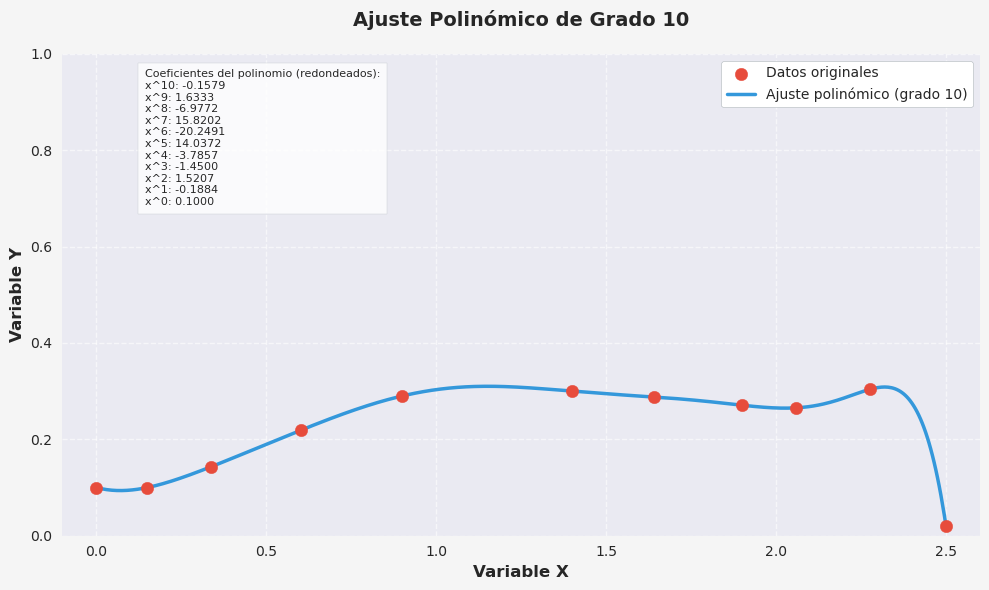

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Configuración de estilo para gráficos más profesionales
plt.style.use('seaborn-v0_8')
rcParams['font.family'] = 'DejaVu Sans'
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 14
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10

# Datos de entrada
x = np.array([0, 0.15, 0.3382, 0.6027, 0.9, 1.4, 1.6395, 1.9, 2.0575, 2.2762, 2.5])
y = np.array([0.1, 0.1, 0.1433, 0.2193, 0.29, 0.3, 0.2879, 0.2708, 0.2653, 0.3038, 0.02])

# Ajuste polinómico
degree = 10
coefficients = np.polyfit(x, y, deg=degree)
polynomial = np.poly1d(coefficients)

# Redondeo de coeficientes a 4 decimales
rounded_coeffs = np.round(coefficients, 4)
rounded_poly = np.poly1d(rounded_coeffs)

# Imprimir resultados redondeados
print("Coeficientes del polinomio (mayor a menor grado):")
for i, coeff in enumerate(rounded_coeffs):
    print(f"x^{degree-i}: {coeff:.4f}")

print("\nFunción estimada (redondeada a 4 decimales):")
print(rounded_poly)

# Puntos para la curva suave
x_new = np.linspace(0, 2.5, 500)
y_new = polynomial(x_new)

# Creación de la figura
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
fig.patch.set_facecolor('#f5f5f5')  # Color de fondo

# Gráfico de dispersión y curva
scatter = ax.scatter(x, y, color='#e74c3c', s=80, label='Datos originales', zorder=3)
curve = ax.plot(x_new, y_new, color='#3498db', linewidth=2.5, 
                label=f'Ajuste polinómico (grado {degree})', zorder=2)


plt.ylim(0, 1)
ax.set_xlim(-0.1, 2.6)
ax.set_xlabel('Variable X', fontweight='bold')
ax.set_ylabel('Variable Y', fontweight='bold')
ax.set_title('Ajuste Polinómico de Grado 10', pad=20, fontweight='bold')

# Cuadrícula y estilo del eje
ax.grid(True, linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#95a5a6')
ax.spines['bottom'].set_color('#95a5a6')

# Leyenda mejorada
legend = ax.legend(frameon=True, framealpha=1, 
                  facecolor='white', edgecolor='#bdc3c7',
                  loc='upper right', fontsize=10)
legend.get_frame().set_linewidth(0.5)

# Texto con los coeficientes redondeados
coeff_text = "Coeficientes del polinomio (redondeados):\n" + "\n".join(
    [f"x^{degree-i}: {coeff:.4f}" for i, coeff in enumerate(rounded_coeffs)])
fig.text(0.15, 0.65, coeff_text, fontsize=8, 
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='#bdc3c7', pad=5))

plt.tight_layout()
plt.show()

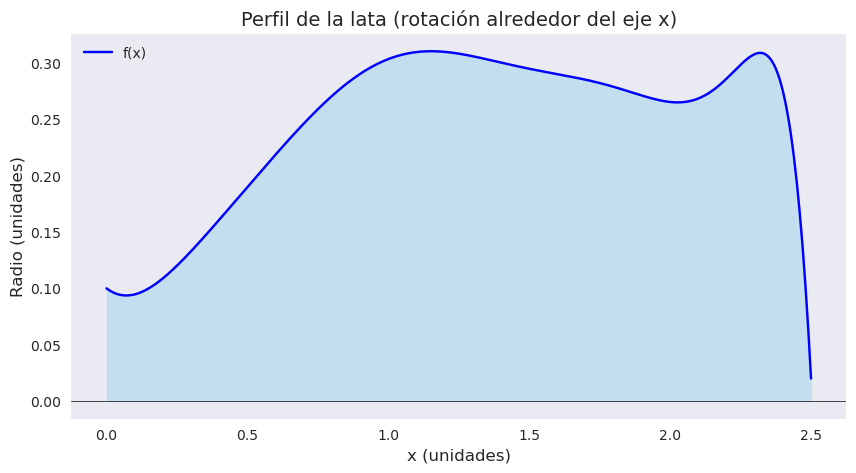

Volumen calculado: 514.48 cm³


In [75]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Polinomio corregido (grado 10)
def f(x):
    return (-0.15788284 * x**10 + 1.63325952 * x**9 - 6.97721784 * x**8 +
            15.82023771 * x**7 - 20.24907682 * x**6 + 14.03722801 * x**5 -
            3.78565006 * x**4 - 1.4500429 * x**3 + 1.52071035 * x**2 -
            0.18844139 * x + 0.1)

# Graficar f(x) en [0, 2.5]
x = np.linspace(0, 2.5, 500)
y = f(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="f(x)", color="blue")
plt.fill_between(x, y, color="skyblue", alpha=0.4)
plt.title("Perfil de la lata (rotación alrededor del eje x)")
plt.xlabel("x (unidades)")
plt.ylabel("Radio (unidades)")
plt.axhline(0, color="black", linewidth=0.5)
plt.grid()
plt.legend()
plt.show()

# Calcular volumen (discos)
V_discos, error = quad(lambda x: np.pi * f(x)**2, 0, 2.5)
V_discos_cm3 = V_discos * 1000  # Escalar a cm³

print(f"Volumen calculado: {V_discos_cm3:.2f} cm³")

### Solidos de revolucion ya aplicados con librerias 

In [81]:
def f(x):
    return (-0.15788284 * x**10 + 1.63325952 * x**9 - 6.97721784 * x**8 +
            15.82023771 * x**7 - 20.24907682 * x**6 + 14.03722801 * x**5 -
            3.78565006 * x**4 - 1.4500429 * x**3 + 1.52071035 * x**2 -
            0.18844139 * x + 0.1)

In [ ]:
import numpy as np
from scipy.integrate import quad

# Parámetros
a, b = 0, 2.5  # Intervalo original
factor_escala = 1000  # 1 unidad³ = 1000 cm³

# Método de Discos (rotación alrededor del eje x)
V_discos, _ = quad(lambda x: np.pi * f(x)**2, a, b)
V_discos_cm3 = V_discos * factor_escala

# Método de Cilindros (rotación alrededor del eje y)
V_cilindros, _ = quad(lambda x: 2 * np.pi * x * abs(f(x)), a, b)
V_cilindros_cm3 = V_cilindros * 100

# Método de Arandelas (ejemplo con radio interno k=0.1)
k = 0.1  # Ajusta este valor según el hueco de la botella
V_arandelas, _ = quad(lambda x: np.pi * (f(x)**2 - k**2), a, b)
V_arandelas_cm3 = V_arandelas * factor_escala

print(f"Volumen por discos: {V_discos_cm3:.2f} cm³")
print(f"Volumen por cilindros: {V_cilindros_cm3:.2f} cm³")
print(f"Volumen por arandelas (k={k}): {V_arandelas_cm3:.2f} cm³")

Volumen por discos: 514.48 cm³
Volumen por cilindros: 531.45 cm³
Volumen por arandelas (k=0.1): 435.94 cm³


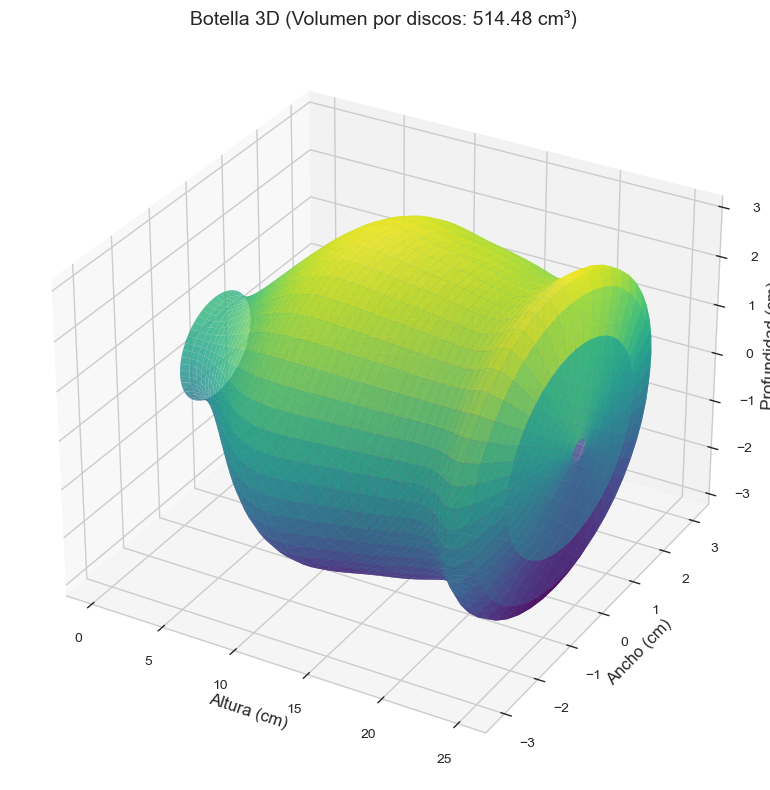

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear malla para 3D
theta = np.linspace(0, 2*np.pi, 50)  # Ángulo de rotación
x = np.linspace(a, b, 50)            # Eje x
X, Theta = np.meshgrid(x, theta)     # Malla 2D

# Coordenadas cilíndricas a cartesianas
Y = f(X) * np.cos(Theta)  # Radio * cos(theta)
Z = f(X) * np.sin(Theta)  # Radio * sin(theta)

# Escalar a cm (opcional, si se desea en unidades reales)
X_cm = X * 10
Y_cm = Y * 10
Z_cm = Z * 10

# Plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_cm, Y_cm, Z_cm, cmap='viridis', alpha=0.8, edgecolor='none')
ax.set_title(f"Botella 3D (Volumen por discos: {V_discos_cm3:.2f} cm³)")
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Ancho (cm)')
ax.set_zlabel('Profundidad (cm)')
plt.tight_layout()
plt.show()

Volumen por método de discos: 0.514479 unidades cúbicas
Volumen por método de arandelas: 0.514479 unidades cúbicas
Volumen por método de cilindros: 0.531489 unidades cúbicas

En centímetros cúbicos (vida real):
Volumen por método de discos: 514.478572 cm³
Volumen por método de arandelas: 514.478572 cm³
Volumen por método de cilindros: 531.488520 cm³

Visualizando todas las gráficas 3D...


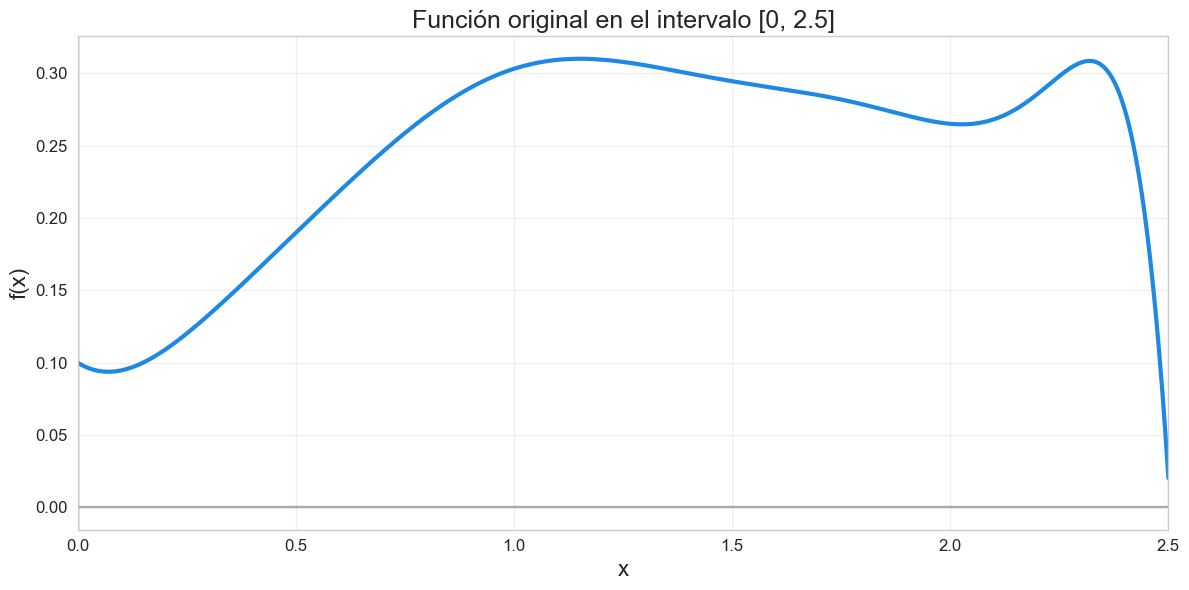

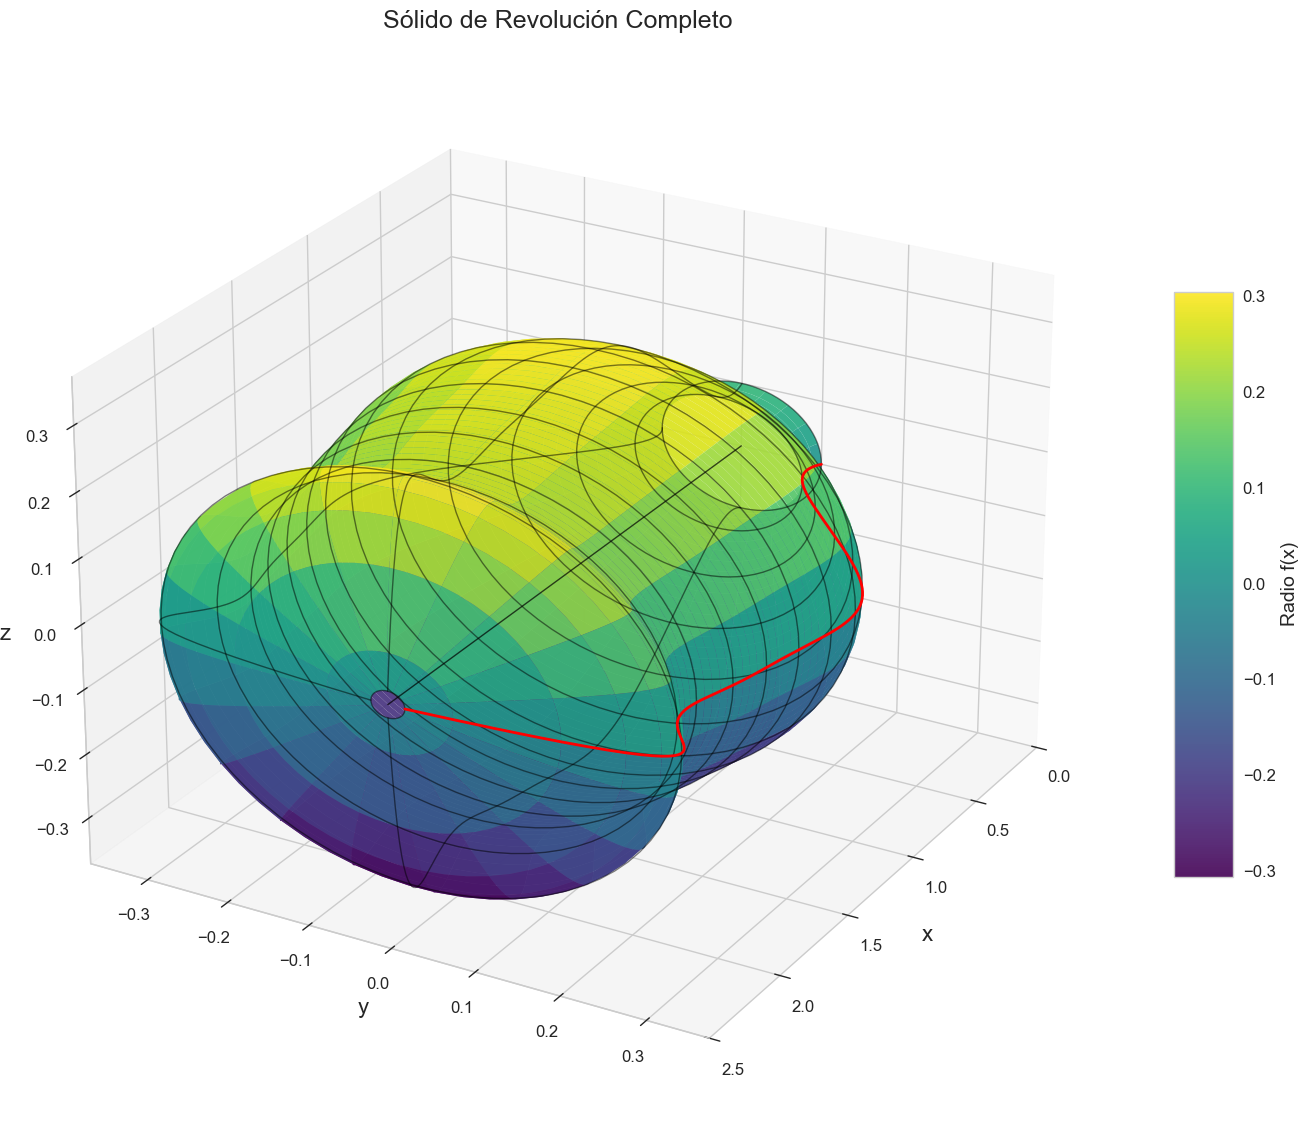

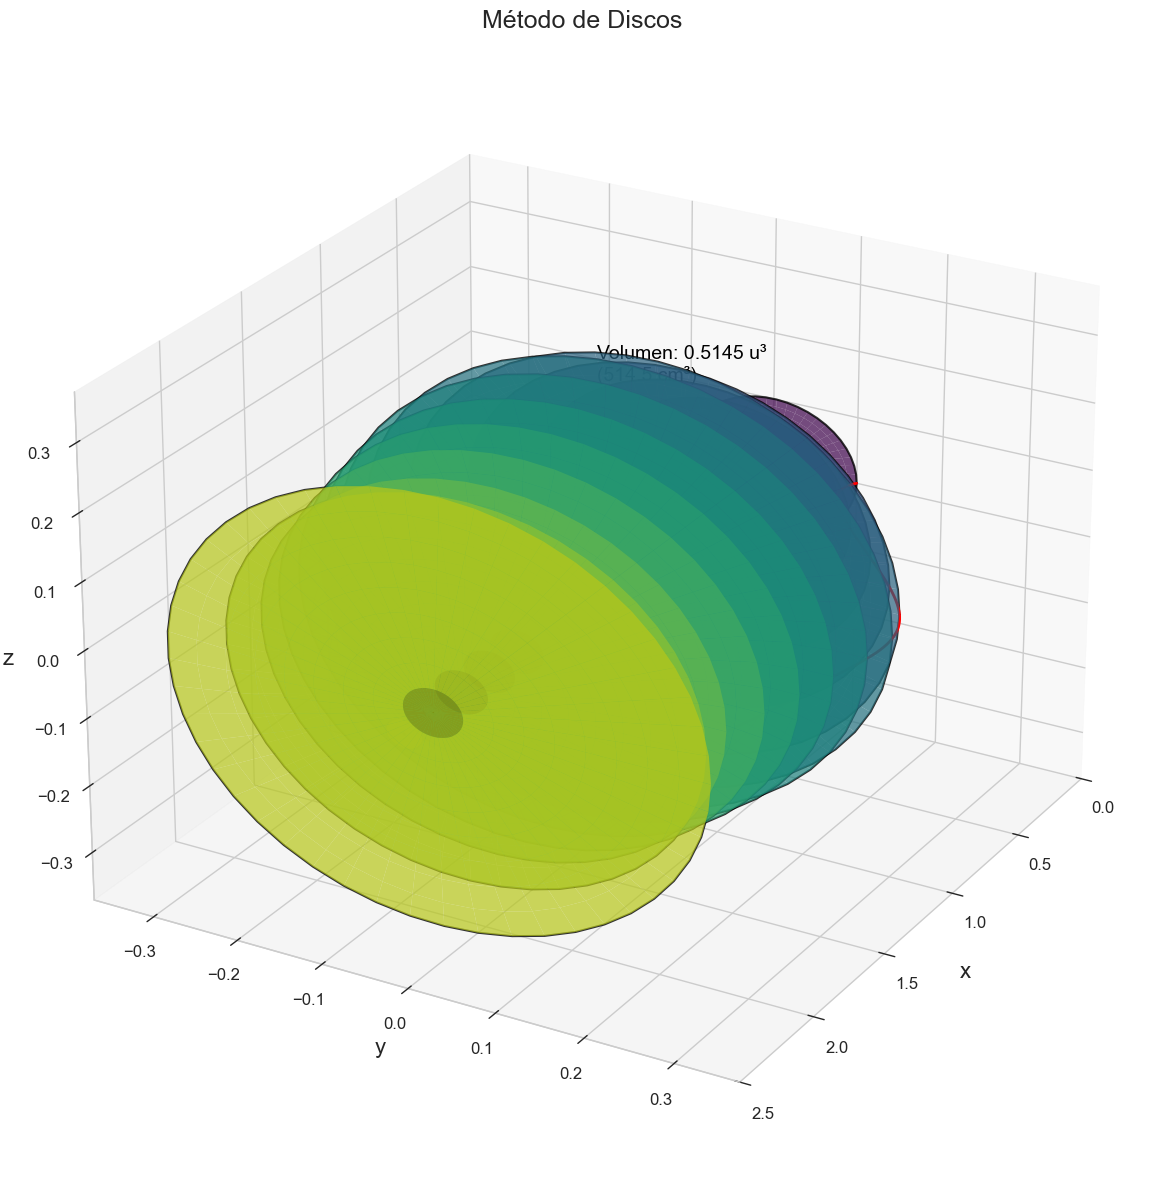

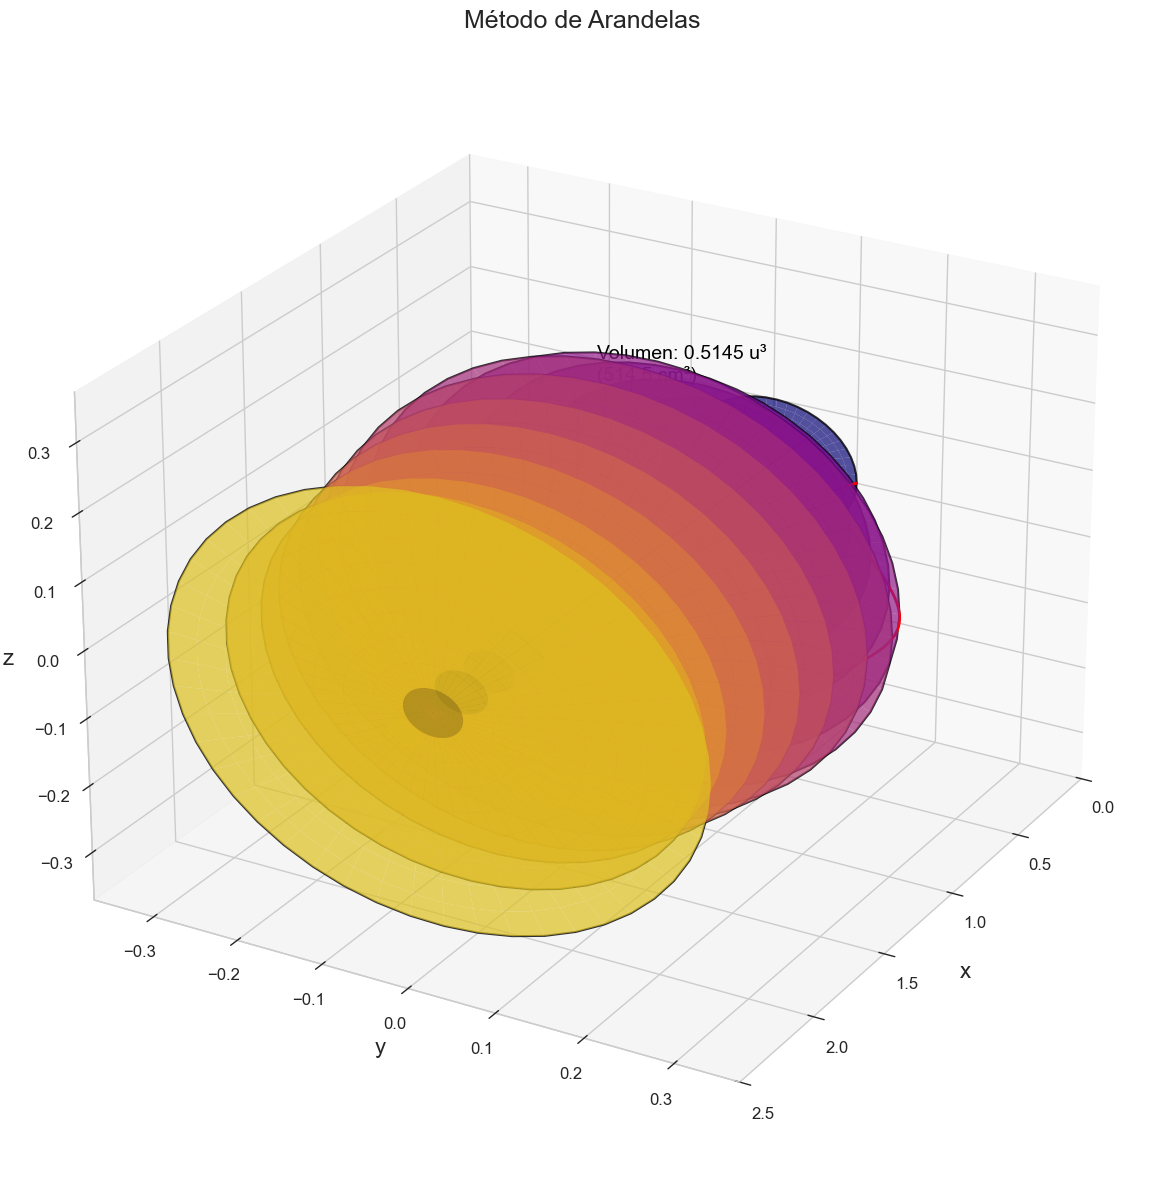

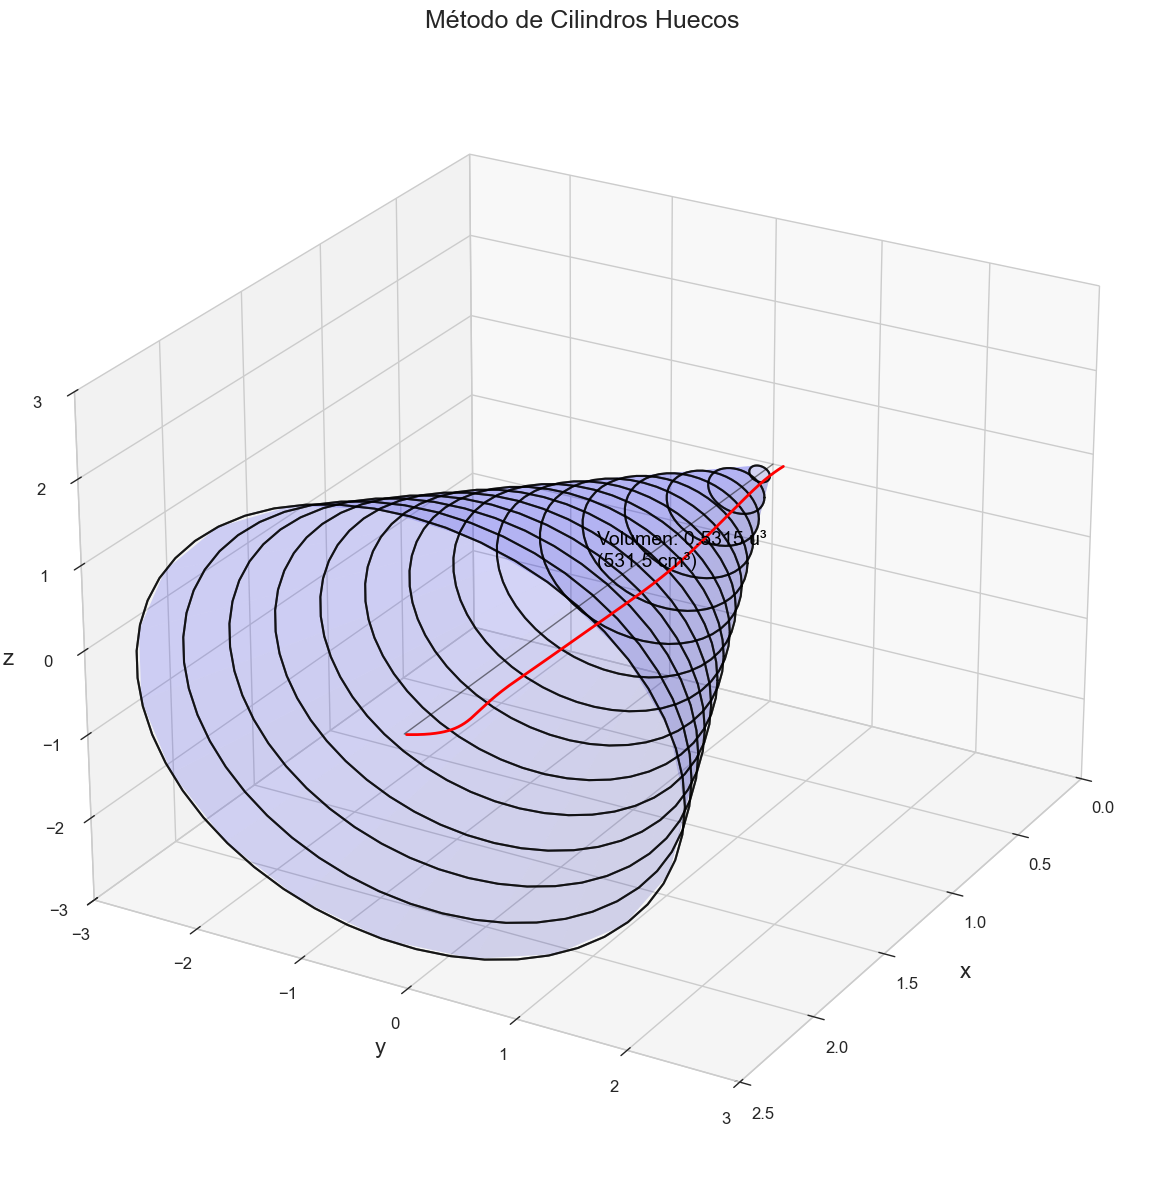

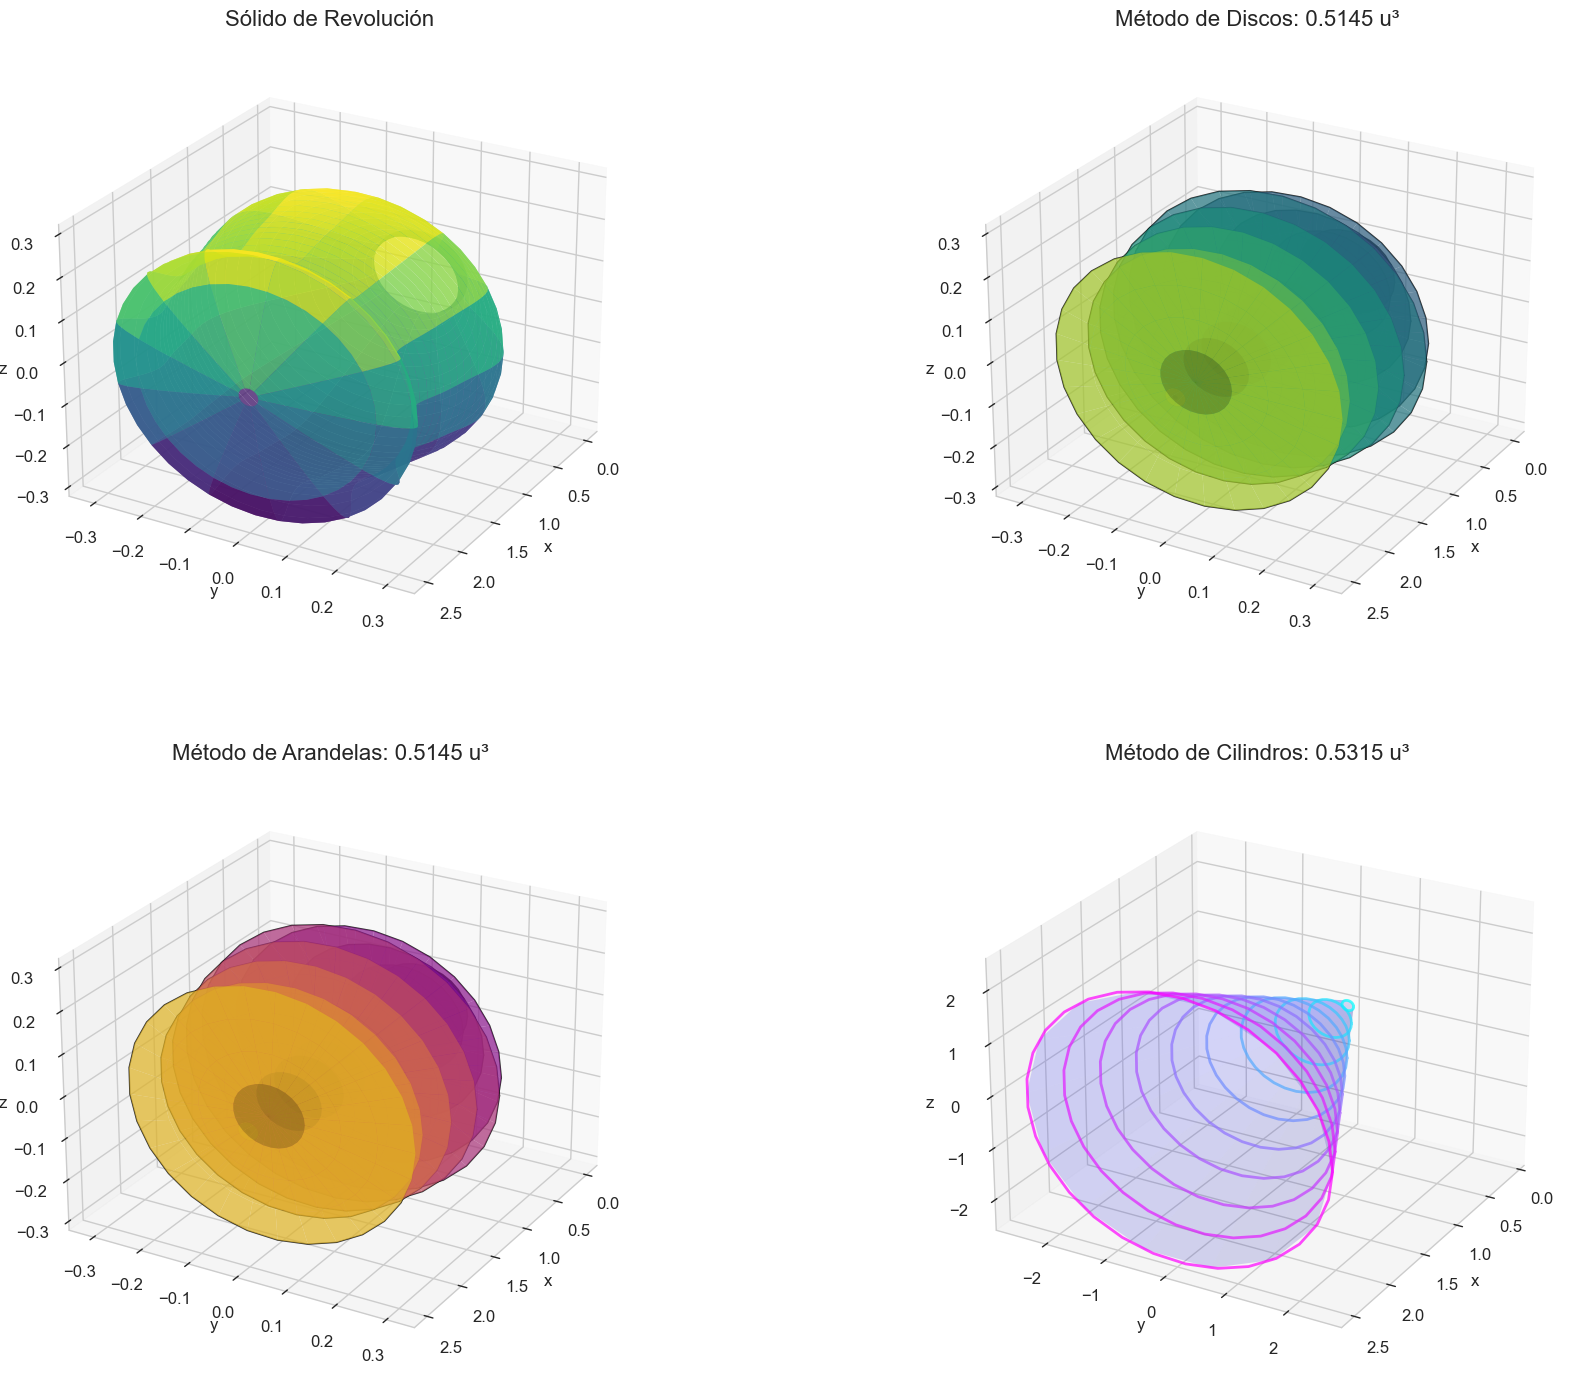

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import integrate

# Definir la función polinómica
def f(x):
    return (-0.15788284 * x**10 + 1.63325952 * x**9 - 6.97721784 * x**8 +
            15.82023771 * x**7 - 20.24907682 * x**6 + 14.03722801 * x**5 -
            3.78565006 * x**4 - 1.4500429 * x**3 + 1.52071035 * x**2 -
            0.18844139 * x + 0.1)

# Intervalo
a, b = 0, 2.5
escala = 1  # 1 unidad en el plano = 10 cm en la vida real

# Crear puntos para graficar
x = np.linspace(a, b, 1000)
y = f(x)

# Calcular volúmenes
# Método de discos
def integrando_discos(x):
    return np.pi * f(x)**2

# Método de arandelas
def integrando_arandelas(x):
    return np.pi * (f(x)**2 - 0)

# Método de cilindros
def volumen_cilindros():
    total = 0
    x_points = np.linspace(a, b, 1000)
    dx = (b - a) / 999
    
    for xi in x_points:
        radio = xi
        altura = f(xi)
        
        if radio > 0 and altura > 0:
            vol = 2 * np.pi * radio * altura * dx
            total += vol
    
    return total/10

# Calcular volúmenes
vol_discos, _ = integrate.quad(integrando_discos, a, b)
vol_arandelas, _ = integrate.quad(integrando_arandelas, a, b)
vol_cilindros = volumen_cilindros()

# Mostrar resultados
print(f"Volumen por método de discos: {vol_discos:.6f} unidades cúbicas")
print(f"Volumen por método de arandelas: {vol_arandelas:.6f} unidades cúbicas")
print(f"Volumen por método de cilindros: {vol_cilindros:.6f} unidades cúbicas")

# Convertir a cm³
factor_conversion = 10**3  # 1 unidad cúbica = 1000 cm³
print(f"\nEn centímetros cúbicos (vida real):")
print(f"Volumen por método de discos: {vol_discos * factor_conversion:.6f} cm³")
print(f"Volumen por método de arandelas: {vol_arandelas * factor_conversion:.6f} cm³")
print(f"Volumen por método de cilindros: {vol_cilindros * factor_conversion:.6f} cm³")

# Configuración estética mejorada
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Función para visualizar la curva original
def visualizar_curva_original():
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(x, y, linewidth=3, color='#1e88e5')
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.set_title('Función original en el intervalo [0, 2.5]', fontsize=18)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('f(x)', fontsize=16)
    ax.set_xlim(a, b)
    plt.tight_layout()
    plt.show()

# Función para visualizar el sólido de revolución completo
def visualizar_solido_completo():
    fig = plt.figure(figsize=(14, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    # Crear malla densa para una visualización suave
    theta = np.linspace(0, 2*np.pi, 60)
    x_plot = np.linspace(a, b, 200)
    
    # Crear la malla
    theta_grid, x_grid = np.meshgrid(theta, x_plot)
    r_grid = f(x_grid)
    
    # Convertir a coordenadas cartesianas
    X = x_grid
    Y = r_grid * np.cos(theta_grid)
    Z = r_grid * np.sin(theta_grid)
    
    # Graficar la superficie con colores mejorados
    surface = ax.plot_surface(X, Y, Z, cmap=cm.viridis, 
                             alpha=0.9, rstride=3, cstride=3, 
                             linewidth=0, antialiased=True)
    
    # Añadir curvas de contorno para mejor visualización
    for xi in np.linspace(a, b, 15):
        r = f(xi)
        if r > 0:
            theta_points = np.linspace(0, 2*np.pi, 80)
            x_circle = xi * np.ones_like(theta_points)
            y_circle = r * np.cos(theta_points)
            z_circle = r * np.sin(theta_points)
            ax.plot(x_circle, y_circle, z_circle, color='black', alpha=0.5, linewidth=1)
    
    # Añadir líneas meridionales para mejor visualización
    for theta_val in [0, np.pi/2, np.pi, 3*np.pi/2]:
        ax.plot(x_plot, f(x_plot) * np.cos(theta_val), f(x_plot) * np.sin(theta_val), 
                color='black', alpha=0.5, linewidth=1)
    
    # Añadir la curva original
    ax.plot(x_plot, f(x_plot), np.zeros_like(x_plot), color='red', linewidth=2)
    
    # Añadir ejes de referencia
    ax.plot([a, b], [0, 0], [0, 0], color='black', linewidth=1, alpha=0.7)
    
    # Mejorar visualización
    fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10, label='Radio f(x)')
    ax.set_title('Sólido de Revolución Completo', fontsize=18)
    ax.set_xlabel('x', fontsize=16, labelpad=10)
    ax.set_ylabel('y', fontsize=16, labelpad=10)
    ax.set_zlabel('z', fontsize=16, labelpad=10)
    
    # Ajustar los límites y perspectiva
    ax.set_xlim(a, b)
    max_radius = np.max(np.abs(f(x_plot))) * 1.2
    ax.set_ylim(-max_radius, max_radius)
    ax.set_zlim(-max_radius, max_radius)
    ax.view_init(elev=25, azim=30)
    
    plt.tight_layout()
    plt.show()

# Función para visualizar el método de discos
def visualizar_discos():
    fig = plt.figure(figsize=(14, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    # Elegir puntos para los discos
    x_discos = np.linspace(a, b, 15)
    
    # Colores dinámicos
    colors = plt.cm.viridis(np.linspace(0, 1, len(x_discos)))
    
    for i, xi in enumerate(x_discos):
        r = f(xi)
        if r > 0:
            # Crear disco
            theta = np.linspace(0, 2*np.pi, 50)
            r_points = np.linspace(0, r, 10)
            theta_grid, r_grid = np.meshgrid(theta, r_points)
            
            # Posición de los discos
            X = xi * np.ones_like(theta_grid)
            Y = r_grid * np.cos(theta_grid)
            Z = r_grid * np.sin(theta_grid)
            
            # Dibujar disco
            ax.plot_surface(X, Y, Z, color=colors[i], alpha=0.7, shade=True)
            
            # Dibujar borde del disco
            X_borde = xi * np.ones_like(theta)
            Y_borde = r * np.cos(theta)
            Z_borde = r * np.sin(theta)
            ax.plot(X_borde, Y_borde, Z_borde, color='black', alpha=0.8, linewidth=1.5)
    
    # Añadir curva original
    ax.plot(x, f(x), np.zeros_like(x), color='red', linewidth=2, label='Curva f(x)')
    ax.plot(x, np.zeros_like(x), np.zeros_like(x), color='black', alpha=0.5, linewidth=1)
    
    # Añadir texto con el volumen calculado
    ax.text(b/2, 0, np.max(f(x)), 
            f"Volumen: {vol_discos:.4f} u³\n({vol_discos * factor_conversion:.1f} cm³)", 
            color='black', fontsize=14)
    
    ax.set_title('Método de Discos', fontsize=18)
    ax.set_xlabel('x', fontsize=16, labelpad=10)
    ax.set_ylabel('y', fontsize=16, labelpad=10)
    ax.set_zlabel('z', fontsize=16, labelpad=10)
    
    # Ajustar visualización
    ax.set_xlim(a, b)
    max_radius = np.max(np.abs(f(x))) * 1.2
    ax.set_ylim(-max_radius, max_radius)
    ax.set_zlim(-max_radius, max_radius)
    ax.view_init(elev=25, azim=30)
    
    plt.tight_layout()
    plt.show()

# Función para visualizar el método de arandelas
def visualizar_arandelas():
    fig = plt.figure(figsize=(14, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    # Elegir puntos para las arandelas
    x_arandelas = np.linspace(a, b, 15)
    
    # Colores dinámicos
    colors = plt.cm.plasma(np.linspace(0, 1, len(x_arandelas)))
    
    for i, xi in enumerate(x_arandelas):
        r_exterior = f(xi)
        r_interior = 0  # En este caso particular
        
        if r_exterior > 0:
            theta = np.linspace(0, 2*np.pi, 50)
            r_points = np.linspace(r_interior, r_exterior, 10)
            theta_grid, r_grid = np.meshgrid(theta, r_points)
            
            # Posición de las arandelas
            X = xi * np.ones_like(theta_grid)
            Y = r_grid * np.cos(theta_grid)
            Z = r_grid * np.sin(theta_grid)
            
            # Dibujar arandela
            ax.plot_surface(X, Y, Z, color=colors[i], alpha=0.7, shade=True)
            
            # Dibujar borde exterior
            X_ext = xi * np.ones_like(theta)
            Y_ext = r_exterior * np.cos(theta)
            Z_ext = r_exterior * np.sin(theta)
            ax.plot(X_ext, Y_ext, Z_ext, color='black', alpha=0.8, linewidth=1.5)
            
            # Dibujar borde interior si existe
            if r_interior > 0:
                X_int = xi * np.ones_like(theta)
                Y_int = r_interior * np.cos(theta)
                Z_int = r_interior * np.sin(theta)
                ax.plot(X_int, Y_int, Z_int, color='black', alpha=0.8, linewidth=1.5)
    
    # Añadir curva original
    ax.plot(x, f(x), np.zeros_like(x), color='red', linewidth=2, label='Curva f(x)')
    ax.plot(x, np.zeros_like(x), np.zeros_like(x), color='black', alpha=0.5, linewidth=1)
    
    # Añadir texto con el volumen calculado
    ax.text(b/2, 0, np.max(f(x)), 
            f"Volumen: {vol_arandelas:.4f} u³\n({vol_arandelas * factor_conversion:.1f} cm³)", 
            color='black', fontsize=14)
    
    ax.set_title('Método de Arandelas', fontsize=18)
    ax.set_xlabel('x', fontsize=16, labelpad=10)
    ax.set_ylabel('y', fontsize=16, labelpad=10)
    ax.set_zlabel('z', fontsize=16, labelpad=10)
    
    # Ajustar visualización
    ax.set_xlim(a, b)
    max_radius = np.max(np.abs(f(x))) * 1.2
    ax.set_ylim(-max_radius, max_radius)
    ax.set_zlim(-max_radius, max_radius)
    ax.view_init(elev=25, azim=30)
    
    plt.tight_layout()
    plt.show()

# Función para visualizar el método de cilindros
def visualizar_cilindros():
    fig = plt.figure(figsize=(14, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    # Elegir puntos para los cilindros
    x_cilindros = np.linspace(a + 0.1, b, 15)  # Evitar x=0
    
    # Colores dinámicos
    colors = plt.cm.cool(np.linspace(0, 1, len(x_cilindros)))
    
    for i, xi in enumerate(x_cilindros):
        radio = xi
        altura = f(xi)
        
        if altura > 0 and radio > 0:
            # Generar puntos para el cilindro
            theta = np.linspace(0, 2*np.pi, 50)
            h_points = np.linspace(0, altura, 2)
            
            # Para cada ángulo theta, crear un cilindro
            for j, t in enumerate(theta):
                x_line = np.ones(20) * xi
                y_line = np.ones(20) * radio * np.cos(t)
                z_line = np.ones(20) * radio * np.sin(t)
                
                # Dibujar línea vertical del cilindro
                ax.plot(x_line, y_line, z_line, color=colors[i], alpha=0.2)
            
            # Dibujar círculos en los extremos para claridad
            for h in h_points:
                theta_circle = np.linspace(0, 2*np.pi, 50)
                x_circle = np.ones_like(theta_circle) * xi
                y_circle = radio * np.cos(theta_circle)
                z_circle = radio * np.sin(theta_circle)
                
                ax.plot(x_circle, y_circle, z_circle, color='black', alpha=0.7, linewidth=1.5)
    
    # Crear puntos muestreados para visualizar las cáscaras cilíndricas
    theta_grid, x_grid = np.meshgrid(np.linspace(0, 2*np.pi, 20), x_cilindros)
    X = x_grid
    Y = x_grid * np.cos(theta_grid)
    Z = x_grid * np.sin(theta_grid)
    
    # Dibujar cáscaras cilíndricas semitransparentes
    ax.plot_surface(X, Y, Z, color='blue', alpha=0.15, shade=True)
    
    # Añadir curva original
    ax.plot(x, f(x), np.zeros_like(x), color='red', linewidth=2, label='Curva f(x)')
    ax.plot(x, np.zeros_like(x), np.zeros_like(x), color='black', alpha=0.5, linewidth=1)
    
    # Añadir texto con el volumen calculado
    ax.text(b/2, 0, np.max(f(x)), 
            f"Volumen: {vol_cilindros:.4f} u³\n({vol_cilindros * factor_conversion:.1f} cm³)", 
            color='black', fontsize=14)
    
    ax.set_title('Método de Cilindros Huecos', fontsize=18)
    ax.set_xlabel('x', fontsize=16, labelpad=10)
    ax.set_ylabel('y', fontsize=16, labelpad=10)
    ax.set_zlabel('z', fontsize=16, labelpad=10)
    
    # Ajustar visualización
    ax.set_xlim(a, b)
    max_radius = max(np.max(np.abs(f(x))), b) * 1.2
    ax.set_ylim(-max_radius, max_radius)
    ax.set_zlim(-max_radius, max_radius)
    ax.view_init(elev=25, azim=30)
    
    plt.tight_layout()
    plt.show()

# Función para mostrar todas las visualizaciones 3D juntas
def comparar_metodos():
    fig = plt.figure(figsize=(18, 14))
    
    # Sólido completo
    ax1 = fig.add_subplot(221, projection='3d')
    theta = np.linspace(0, 2*np.pi, 40)
    x_plot = np.linspace(a, b, 100)
    theta_grid, x_grid = np.meshgrid(theta, x_plot)
    r_grid = f(x_grid)
    X = x_grid
    Y = r_grid * np.cos(theta_grid)
    Z = r_grid * np.sin(theta_grid)
    surface = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8, rstride=3, cstride=3)
    ax1.set_title('Sólido de Revolución', fontsize=16)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('y', fontsize=12)
    ax1.set_zlabel('z', fontsize=12)
    ax1.view_init(elev=25, azim=30)
    
    # Método de discos
    ax2 = fig.add_subplot(222, projection='3d')
    x_discos = np.linspace(a, b, 10)
    colors = plt.cm.viridis(np.linspace(0, 1, len(x_discos)))
    for i, xi in enumerate(x_discos):
        r = f(xi)
        if r > 0:
            theta = np.linspace(0, 2*np.pi, 30)
            r_points = np.linspace(0, r, 5)
            theta_grid, r_grid = np.meshgrid(theta, r_points)
            X = xi * np.ones_like(theta_grid)
            Y = r_grid * np.cos(theta_grid)
            Z = r_grid * np.sin(theta_grid)
            ax2.plot_surface(X, Y, Z, color=colors[i], alpha=0.7)
            X_borde = xi * np.ones_like(theta)
            Y_borde = r * np.cos(theta)
            Z_borde = r * np.sin(theta)
            ax2.plot(X_borde, Y_borde, Z_borde, color='black', alpha=0.8, linewidth=1)
    ax2.set_title(f'Método de Discos: {vol_discos:.4f} u³', fontsize=16)
    ax2.set_xlabel('x', fontsize=12)
    ax2.set_ylabel('y', fontsize=12)
    ax2.set_zlabel('z', fontsize=12)
    ax2.view_init(elev=25, azim=30)
    
    # Método de arandelas
    ax3 = fig.add_subplot(223, projection='3d')
    x_arandelas = np.linspace(a, b, 10)
    colors = plt.cm.plasma(np.linspace(0, 1, len(x_arandelas)))
    for i, xi in enumerate(x_arandelas):
        r = f(xi)
        if r > 0:
            theta = np.linspace(0, 2*np.pi, 30)
            r_points = np.linspace(0, r, 5)
            theta_grid, r_grid = np.meshgrid(theta, r_points)
            X = xi * np.ones_like(theta_grid)
            Y = r_grid * np.cos(theta_grid)
            Z = r_grid * np.sin(theta_grid)
            ax3.plot_surface(X, Y, Z, color=colors[i], alpha=0.7)
            X_borde = xi * np.ones_like(theta)
            Y_borde = r * np.cos(theta)
            Z_borde = r * np.sin(theta)
            ax3.plot(X_borde, Y_borde, Z_borde, color='black', alpha=0.8, linewidth=1)
    ax3.set_title(f'Método de Arandelas: {vol_arandelas:.4f} u³', fontsize=16)
    ax3.set_xlabel('x', fontsize=12)
    ax3.set_ylabel('y', fontsize=12)
    ax3.set_zlabel('z', fontsize=12)
    ax3.view_init(elev=25, azim=30)
    
    # Método de cilindros
    ax4 = fig.add_subplot(224, projection='3d')
    x_cilindros = np.linspace(a + 0.1, b, 10)
    colors = plt.cm.cool(np.linspace(0, 1, len(x_cilindros)))
    for i, xi in enumerate(x_cilindros):
        radio = xi
        altura = f(xi)
        if altura > 0 and radio > 0:
            theta = np.linspace(0, 2*np.pi, 30)
            X_circle = np.ones_like(theta) * xi
            Y_circle = radio * np.cos(theta)
            Z_circle = radio * np.sin(theta)
            ax4.plot(X_circle, Y_circle, Z_circle, color=colors[i], alpha=0.7, linewidth=2)
    # Superficies semitransparentes para los cilindros
    theta_grid, x_grid = np.meshgrid(np.linspace(0, 2*np.pi, 15), x_cilindros)
    X = x_grid
    Y = x_grid * np.cos(theta_grid)
    Z = x_grid * np.sin(theta_grid)
    ax4.plot_surface(X, Y, Z, color='blue', alpha=0.15)
    ax4.set_title(f'Método de Cilindros: {vol_cilindros:.4f} u³', fontsize=16)
    ax4.set_xlabel('x', fontsize=12)
    ax4.set_ylabel('y', fontsize=12)
    ax4.set_zlabel('z', fontsize=12)
    ax4.view_init(elev=25, azim=30)
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    plt.show()

# Mostrar todas las visualizaciones
print("\nVisualizando todas las gráficas 3D...")
visualizar_curva_original()
visualizar_solido_completo()
visualizar_discos()
visualizar_arandelas()
visualizar_cilindros()
comparar_metodos()